# PAM 기반 군집분석
* PAM은 K-medoids 알고리즘의 일종으로, 각 군집의 중심을 실제 데이터 포인트로 선택한다. 이를 통해 군집의 중앙을 더 정확히 파악할 수 있다.
* PAM 분석을 수행하기 위해 pyclustering 패키지를 사용할 수 있으며, 이 패키지에서 kmedoids 모듈을 제공한다. 
* 여기서는 pyclustering의 K-medoids 구현을 사용하여 PAM 군집 분석을 수행할 것이다.

In [1]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [2]:
# 데이터 로드 및 표준화
wine_data = load_wine()
X = wine_data.data
feature_names = wine_data.feature_names
X = StandardScaler().fit_transform(X)

In [4]:
# 군집 수 설정 (예: 3)
n_clusters = 3

# 초기 medoids 선택
# 임의의 medoids 선택 (여기서는 무작위로 k개의 인덱스를 선택)
initial_medoids = np.random.choice(len(X), n_clusters, replace=False)

In [5]:
# PAM 군집 분석 수행
kmedoids_instance = kmedoids(X, initial_medoids)
kmedoids_instance.process()

In [6]:
# 결과 얻기
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

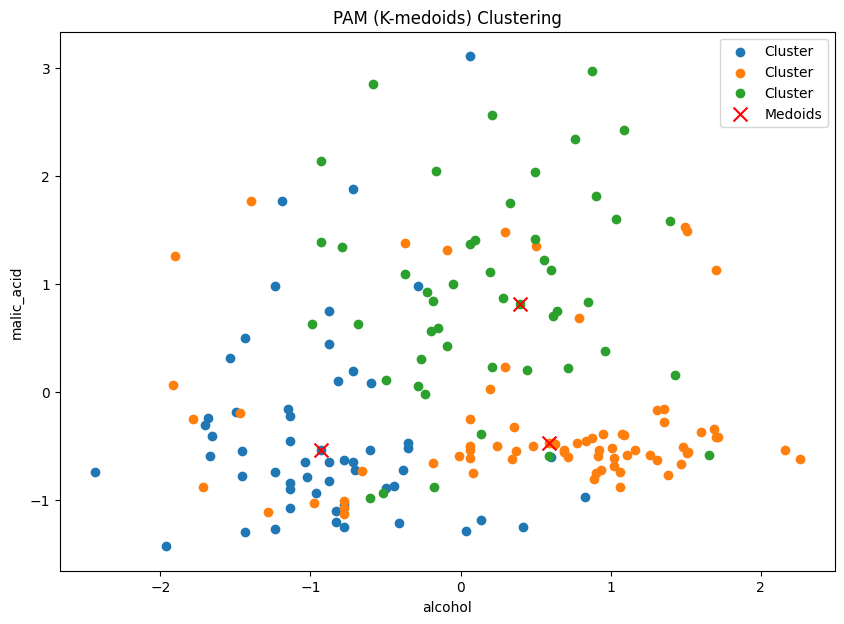

In [8]:
# 군집 시각화 (첫 두 특징만 사용)
plt.figure(figsize=(10, 7))
for cluster in clusters:
    plt.scatter(X[cluster, 0], X[cluster, 1], label='Cluster')

# Medoids 시각화
medoid_points = X[medoids]
plt.scatter(medoid_points[:, 0], medoid_points[:, 1], color='red', marker='x', s=100, label='Medoids')

plt.title('PAM (K-medoids) Clustering')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.legend()
plt.show()

In [9]:
# 군집 정보 출력
print("Medoids:", medoids)
print("Clusters:", clusters)

Medoids: [106  35 148]
Clusters: [[59, 60, 61, 62, 64, 66, 67, 68, 70, 72, 75, 76, 77, 78, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 111, 112, 113, 114, 115, 116, 117, 118, 119, 122, 123, 125, 126, 127, 128, 129], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 63, 65, 69, 71, 73, 74, 79, 95, 96, 98, 109, 110, 120, 121, 124], [83, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177]]
